In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/hyojin2

/content/gdrive/My Drive/hyojin2


In [3]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from model import SiameseNet
import torch
from data_loader import get_test_loader, get_train_validation_loader
from torchinfo import summary
import matplotlib.pyplot as plt

In [5]:
model = SiameseNet()
summary(model)

Layer (type:depth-idx)                   Param #
SiameseNet                               --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       6,464
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
│    └─Conv2d: 2-4                       401,536
│    └─ReLU: 2-5                         --
│    └─MaxPool2d: 2-6                    --
│    └─Conv2d: 2-7                       262,272
│    └─ReLU: 2-8                         --
│    └─MaxPool2d: 2-9                    --
│    └─Conv2d: 2-10                      524,544
│    └─ReLU: 2-11                        --
├─Sequential: 1-2                        --
│    └─Linear: 2-12                      37,752,832
│    └─Sigmoid: 2-13                     --
├─Sequential: 1-3                        --
│    └─Linear: 2-14                      4,097
│    └─Sigmoid: 2-15                     --
Total params: 38,951,745
Trainable params: 38,951,745
Non-trainable params: 0

In [6]:
def show_data(data, index):
  plt.subplot(1,2,1)

  sample = data.dataset[index]
  plt.imshow(sample[0].reshape(105, 105), cmap='gray')

  plt.subplot(1,2,2)
  plt.imshow(sample[1].reshape(105, 105), cmap='gray')

  plt.show()

  print(data.dataset[index][2])

In [7]:
trainloader, valloader = get_train_validation_loader()

In [8]:
len(trainloader.dataset)

100

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/content/gdrive/My Drive/hyojin2/data_loader.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label)


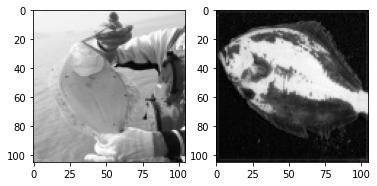

tensor(0.)


In [9]:
show_data(trainloader, 0)

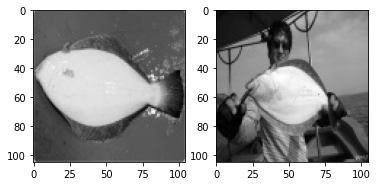

tensor(1.)


In [10]:
show_data(trainloader, 1)

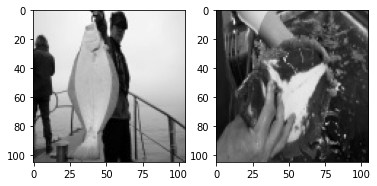

tensor(0.)


In [11]:
show_data(trainloader, 2)

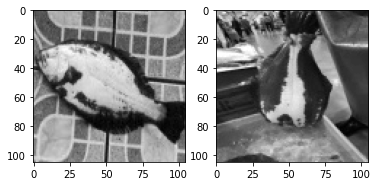

tensor(1.)


In [12]:
show_data(trainloader, 3)

In [13]:
!python3 main.py

Process:   0% 0/30 [00:00<?, ?it/s]
Train:   0% 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/content/gdrive/MyDrive/hyojin2/data_loader.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label)

Train:   0% 0/4 [00:06<?, ?it/s, loss: 0.825]
Train:  25% 1/4 [00:06<00:18,  6.29s/it, loss: 0.825]
Train:  25% 1/4 [00:11<00:18,  6.29s/it, loss: 0.823]
Train:  50% 2/4 [00:11<00:10,  5.45s/it, loss: 0.823]
Train:  50% 2/4 [00:15<00:10,  5.45s/it, loss: 0.672]
Train:  75% 3/4 [00:15<00:04,  4.82s/it, loss: 0.672]
Train:  75% 3/4 [00:18<00:04,  4.82s/it, loss: 0.751]
Train: 100% 4/4 [00:18<00:00,  4.36s/it, loss: 0.751]
                                                     
Validation:   0% 

-> 모델의 Validation loss와 Validation Accuracy가 향상되지 않음

=> Test Acc가 0.48인 것은 그냥 랜덤으로 예측한 결과와 같음

### 예상 문제점

1. 수집된 데이터의 자체의 문제 or 데이터 수의 문제
- 수집된 데이터를 resize 외에 전처리 해주지 않은(Normalization 등등)
2. 파라미터 or 구조적 문제
- Epoch 수, Optimizer, Loss 등 설정의 문제
3. 코드의 문제...?
- 코드의 문제로 weight가 update되지 않았을 수도...?